In [ ]:
import yfinance as yahooFinance
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
GetFacebookInformation = yahooFinance.Ticker("META")

pd.set_option('display.max_rows', None)
# Let us  get historical stock prices for Facebook
# covering the past few years.
# max->maximum number of daily prices available
# for Facebook.
# Valid options are 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y,
# 5y, 10y and ytd.
def clean_data(data):
    data = data.drop('Dividends',axis =1)
    data = data.drop('Volume',axis =1)
    data = data.drop('Stock Splits',axis =1)
    return data
def get_data(period):
    history_stock = GetFacebookInformation.history(period=period)
    history_stock = clean_data(history_stock)
    return history_stock

def define_data(data):
    y = pd.DataFrame(data.pop('Close'))
    list_of_cols = ["Open","High","Low"]
    X = data[list_of_cols]
    X_train,X_test,y_train,y_test = train_test_split(X[list_of_cols],y,test_size=(10/data.shape[0]))
#     dont do random last days, take last 10 days
    x_train = np.array(X_train)
    x_test = np.array(X_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)
#     x_train,x_test = add_bias(x_train,x_test,y_train,y_test)
    return x_train,x_test,y_train,y_test

# Add a bias term (intercept) to your feature matrix:
# This is necessary for the normal equation to work correctly. You can add a column of ones to x_train and x_test.

def add_bias(x_train,x_test,y_train,y_test):
    x_train = np.c_[np.ones(x_train.shape[0]), x_train]
    x_test = np.c_[np.ones(x_test.shape[0]), x_test]
#     y_train = np.c_[np.ones(y_train.shape[0]), y_train]
#     y_test = np.c_[np.ones(y_test.shape[0]), y_test]
    return x_train,x_test

def normal_equation(x, y, alpha=0):
    x_transpose = np.transpose(x)
    identity = np.identity(x.shape[1])
    theta = np.linalg.inv(x_transpose.dot(x) + alpha * identity).dot(x_transpose).dot(y)
    return theta
def gradient_descent(x, y, alpha, learning_rate, num_iterations):

    m, n = x.shape
    x_transpose = np.transpose(x)
    identity = np.identity(x.shape[1])
    theta = np.linalg.inv(x_transpose.dot(x) + alpha * identity).dot(x_transpose).dot(y)
#     print(theta)
    for i in range(num_iterations):
        # Compute the predictions and the gradient
        y_pred = np.dot(x, theta)
#         print(y_pred)
#         theta = theta - (1 / m)*learning_rate *np.dot(x.T, (y_pred - y))
#         gradient = (1 / m) * np.dot(x.T, (y_pred - y)) + (alpha / m) * theta
        gradient = (1 / m) * np.dot(x.T, (y_pred - y))
#         print(gradient)
#         Update the parameters (weights)
        theta = theta - learning_rate * gradient

    return theta

In [ ]:
fb_history_stock = get_data("2y")
x_train,x_test,y_train,y_test = define_data(fb_history_stock)

implement the normal equation:
The normal equation to find the optimal weights (coefficients) for your linear model is given by:

In [ ]:
alpha_values = [0, 0.01, 0.1, 1, 10]  # Experiment with different alpha values
learning_rate = 0.0001
num_iterations = 5

print("Answer with Normal Equation")
#Normal equation model
for alpha in alpha_values:
    # Train the model using the normal equation
    theta = normal_equation(x_train, y_train, alpha=alpha)

    # Make predictions on the test set
    y_pred = x_test.dot(theta)

    # Calculate the Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)

    print(f"Alpha = {alpha}, MSE = {mse}")

print("Answer with GD Method")
# Gradient descent model
for alpha in alpha_values:
    # Train the model using gradient descent
    theta = gradient_descent(x_train, y_train, alpha, learning_rate, num_iterations)

    # Make predictions on the test set
    y_pred2 = x_test.dot(theta)

    # Calculate the Mean Squared Error
    mse = mean_squared_error(y_test, y_pred2)

    print(f"Alpha = {alpha}, MSE = {mse}")

Answer with Normal Equation
Alpha = 0, MSE = 4.642514875134028
Alpha = 0.01, MSE = 4.642518696263055
Alpha = 0.1, MSE = 4.642553090081199
Alpha = 1, MSE = 4.642897364634105
Alpha = 10, MSE = 4.646373432012992
Answer with GD Method
Alpha = 0, MSE = 4.642504339306598
Alpha = 0.01, MSE = 4.658591079498285
Alpha = 0.1, MSE = 4.861648491600914
Alpha = 1, MSE = 12.68642992830315
Alpha = 10, MSE = 670.239503152316


In [ ]:
# plotting data for 6 months data
fb_history_stock = get_data("6mo")
x_train,x_test,y_train,y_test = define_data(fb_history_stock)

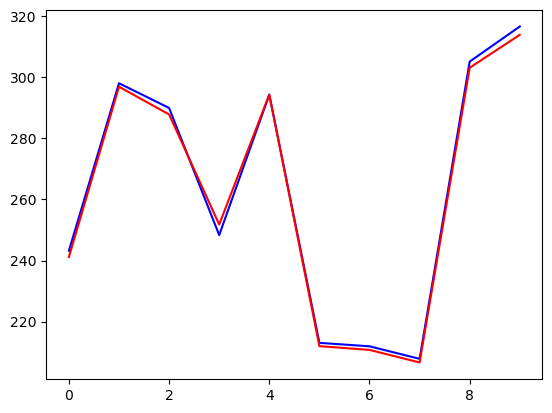

In [ ]:
# Plotting graph
# Train the model using the normal equation
theta = normal_equation(x_train, y_train, alpha=0.01)

# Make predictions on the test set
y_pred = x_test.dot(theta)
# for i in range(len(y_test)):
plt.plot(y_test,color ='blue')
plt.plot(y_pred,color='red')
plt.show()
# print(y_pred)

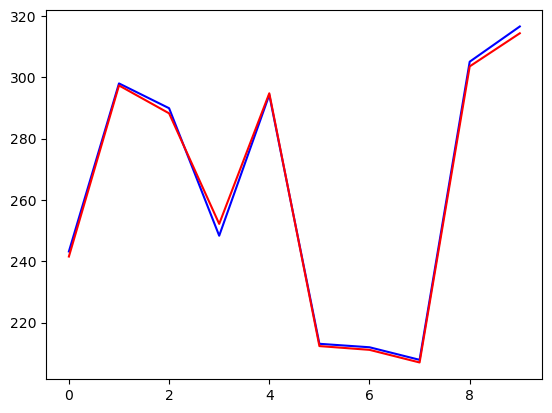

In [ ]:
learning_rate = 0.0001
num_iterations = 5
theta = gradient_descent(x_train, y_train, 0.01, learning_rate, num_iterations)

# Make predictions on the test set
y_pred2 = x_test.dot(theta)
plt.plot(y_test,color ='blue')
plt.plot(y_pred2,color='red')
plt.show()

# Part 2

In [ ]:
from sklearn.linear_model import LogisticRegression
fb_history_stock = get_data("6mo")

In [ ]:
def result_data(data):
    data['PercentageChange'] = data['Close'].pct_change() * 100
    data['PriceIncrease'] = (data['PercentageChange'] > 2).astype(int)
    return data

def define_data(data):
    data = data.drop('Close',axis=1)
    data = data.drop('PercentageChange',axis=1)
    data['DateTime'] = pd.to_datetime(data.index)
    y = pd.DataFrame(data.pop('PriceIncrease'))
    list_of_cols = ["Open","High","Low"]
    X = data[list_of_cols]
    X_train,X_test,y_train,y_test = train_test_split(X[list_of_cols],y,test_size=0.2)
    x_train = np.array(X_train)
    x_test = np.array(X_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)
#     x_train,x_test = add_bias(x_train,x_test,y_train,y_test)
    return x_train,x_test,y_train,y_test


In [ ]:
fb_history_stock = result_data(fb_history_stock)
x_train,x_test,y_train,y_test = define_data(fb_history_stock)

In [ ]:
clf=LogisticRegression(solver='saga', max_iter=100000, tol=0.00001)
clf.fit(x_train,y_train)

/Users/sagarprasad/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=100000, solver='saga', tol=1e-05)

In [ ]:
predicted=clf.predict(x_test)
plt.plot(y_test, y_test['ClosingPrice'], label='Real Closing Price')
plt.plot(y_test, predicted, label='Predicted Price Increase', linestyle='--')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [ ]:
fb_history_stock

,Open,High,Low,Close,PercentageChange,PriceIncrease
Date,,,,,,
2023-03-21 00:00:00-04:00,203.199997,203.550003,197.949997,202.160004,NaN,0
2023-03-22 00:00:00-04:00,202.500000,207.369995,199.669998,199.809998,-1.162449,0
2023-03-23 00:00:00-04:00,202.839996,207.880005,202.149994,204.279999,2.237126,1
2023-03-24 00:00:00-04:00,205.179993,207.580002,203.550003,206.009995,0.846875,0
2023-03-27 00:00:00-04:00,204.809998,205.860001,201.360001,202.839996,-1.538759,0
2023-03-28 00:00:00-04:00,200.149994,201.029999,197.899994,200.679993,-1.064881,0
2023-03-29 00:00:00-04:00,203.559998,205.720001,202.539993,205.350006,2.327095,1
2023-03-30 00:00:00-04:00,203.380005,208.089996,202.820007,207.839996,1.212559,0
2023-03-31 00:00:00-04:00,207.240005,212.169998,206.770004,211.940002,1.972674,0
